In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

In [5]:
!pip install mlxtend

In [6]:
data =pd.read_csv('groceries.csv')
df=data.copy()
df.head()

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [9]:
df['Items']=df['Items'].str.lower()
df.head()

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [10]:
items=df['Items'].str.split(',').values
items.tolist()

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'uht-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

In [12]:
from mlxtend.preprocessing import TransactionEncoder

In [13]:
te=TransactionEncoder()
te_arry=te.fit_transform(items)
te_arry

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False]])

In [14]:
te.columns_

['abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cookware',
 'cream cheese ',
 'curd',
 'curd cheese',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen meals',
 'frozen potato products',
 'frozen vegetables',
 'fruit/vegetable juice',
 'grapes',
 'hair spray',
 'ham',
 'hamburger 

In [15]:
df=pd.DataFrame(te_arry,columns=te.columns_)
df.head()

,abrasive cleaner,artif. sweetener,baby cosmetics,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,...,turkey,uht-milk,vinegar,waffles,whipped/sour cream,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [16]:
from mlxtend.frequent_patterns import apriori
frequent_patterns=apriori(df,min_support=0.01, use_colnames=True)
print(frequent_patterns)

      support                                       itemsets
0    0.011429                                (baking powder)
1    0.060000                                         (beef)
2    0.040000                                      (berries)
3    0.031429                                    (beverages)
4    0.064286                                 (bottled beer)
..        ...                                            ...
309  0.012857  (root vegetables, tropical fruit, whole milk)
310  0.010000          (yogurt, root vegetables, whole milk)
311  0.011429                  (yogurt, sausage, whole milk)
312  0.011429                     (yogurt, soda, whole milk)
313  0.012857           (yogurt, tropical fruit, whole milk)

[314 rows x 2 columns]


In [17]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent_patterns, metric='confidence',min_threshold=0.5)
rules.iloc[:,0:-2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,(cereals),(whole milk),0.011429,0.251429,0.010000,0.875000,3.480114
1,(frankfurter),(rolls/buns),0.068571,0.218571,0.034286,0.500000,2.287582
2,(frozen dessert),(whole milk),0.014286,0.251429,0.011429,0.800000,3.181818
3,(ham),(whole milk),0.022857,0.251429,0.014286,0.625000,2.485795
4,(margarine),(whole milk),0.051429,0.251429,0.025714,0.500000,1.988636
5,(pip fruit),(whole milk),0.045714,0.251429,0.022857,0.500000,1.988636
6,(sliced cheese),(rolls/buns),0.024286,0.218571,0.014286,0.588235,2.691273
7,(waffles),(whole milk),0.025714,0.251429,0.012857,0.500000,1.988636
8,"(yogurt, curd)",(whole milk),0.024286,0.251429,0.014286,0.588235,2.339572
9,"(frankfurter, whole milk)",(rolls/buns),0.021429,0.218571,0.011429,0.533333,2.440087


In [18]:
!pip install networkx

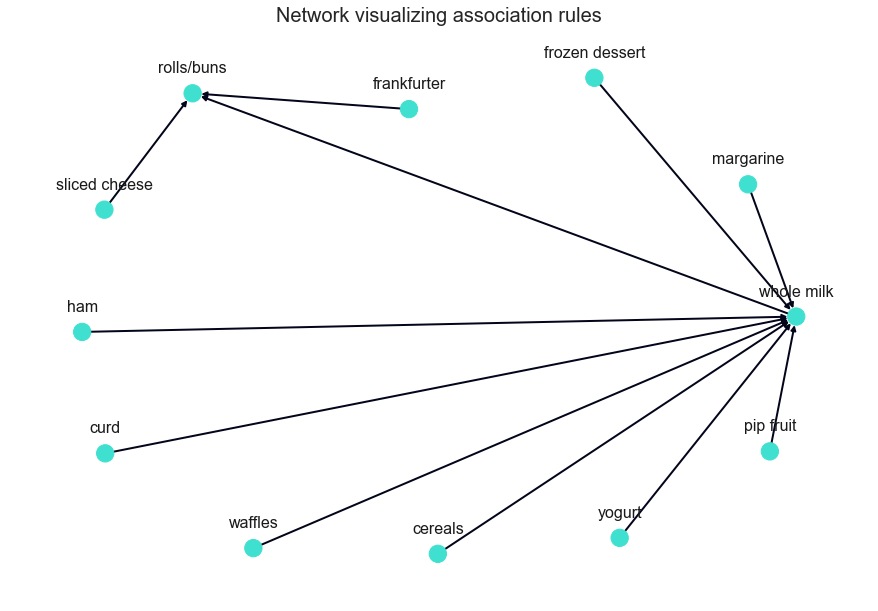

In [20]:
import apriori_helper as ap
ap.draw_graph(rules, 10)